In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [4]:
data=pd.read_csv("/home/hgidea/Desktop/Coding/Python/internship/cognifz/Dataset .csv")

In [5]:
data.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
# Check for missing values in latitude and longitude (crucial for mapping)
print(data['Latitude'].isnull().sum())
print(data['Longitude'].isnull().sum())

0
0


In [7]:
# Side quest
# Create a map centered around the mean latitude and longitude
restaurant_map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)

In [8]:
# Side quest
# Add markers for each restaurant
for index, row in data.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(restaurant_map)


In [10]:
# Side quest
# Save the map
restaurant_map.save('restaurant_distribution_map.html')

In [11]:
# Step 2: Group restaurants by city or locality
city_grouped = data.groupby('City').size().reset_index(name='Count')

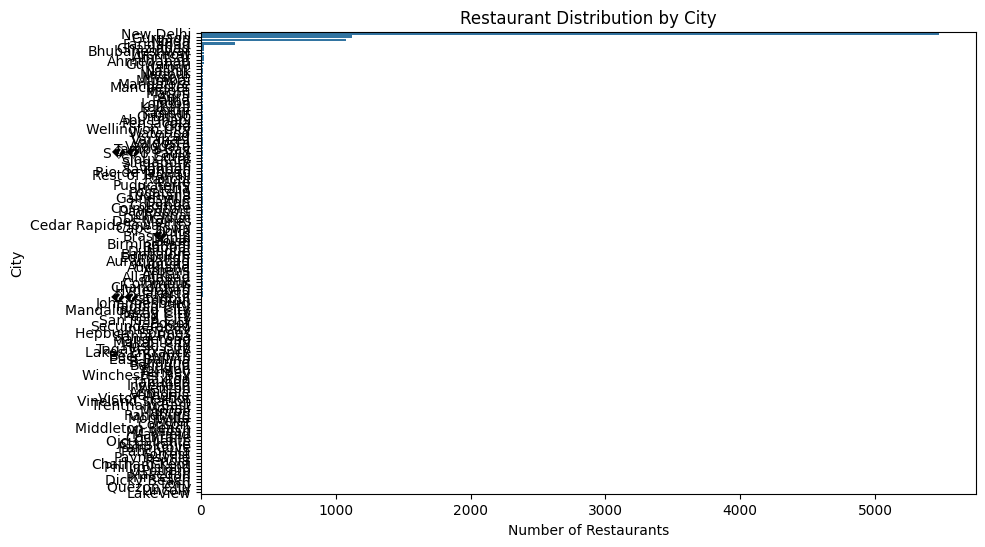

In [15]:
# Plotting the distribution of restaurants by city
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='City', data=city_grouped.sort_values(by='Count', ascending=False))
plt.title('Restaurant Distribution by City')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

In [16]:
# Exploding the cuisines column to handle multiple cuisines per restaurant
data['Cuisines'] = data['Cuisines'].str.split(', ')
cuisine_exploded = data.explode('Cuisines')

In [17]:
# Get the top 10 most common cuisines
top_cuisines = cuisine_exploded['Cuisines'].value_counts().head(10).index

In [18]:
# Filter the dataset to include only the top 10 cuisines
filtered_data = cuisine_exploded[cuisine_exploded['Cuisines'].isin(top_cuisines)]

In [19]:
# Group by city and cuisine
city_cuisine_grouped = filtered_data.groupby(['City', 'Cuisines']).size().unstack(fill_value=0)


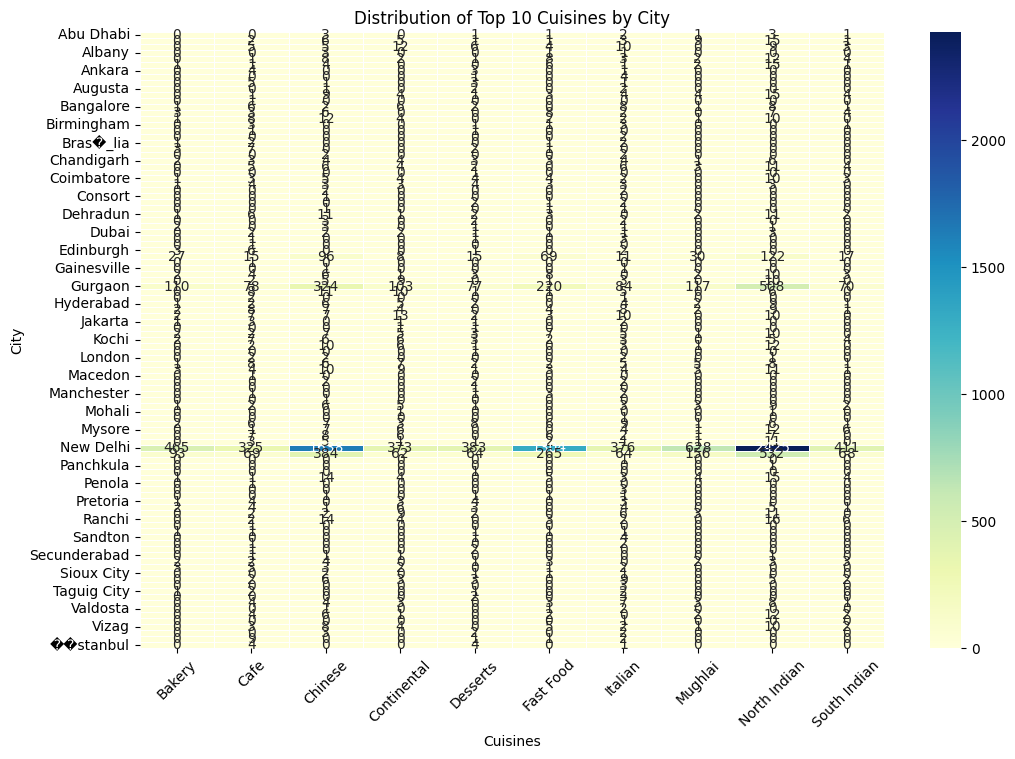

In [20]:
# Plotting the distribution of top cuisines by city
plt.figure(figsize=(12, 8))
sns.heatmap(city_cuisine_grouped, cmap='YlGnBu', linewidths=.5, annot=True, fmt='d')
plt.title('Distribution of Top 10 Cuisines by City')
plt.xlabel('Cuisines')
plt.ylabel('City')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Side quest
from folium.plugins import MarkerCluster

# Create a map centered around the mean latitude and longitude
restaurant_map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)

# Add markers with clustering
marker_cluster = MarkerCluster().add_to(restaurant_map)

for index, row in data.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=f"{row['Restaurant Name']} ({row['Cuisines']})").add_to(marker_cluster)

# Save the map to an HTML file
restaurant_map.save('restaurant_cluster_map.html')


In [23]:
# Side quest
import plotly.express as px

# Aggregating the data by city and average rating for simplicity
city_grouped = data.groupby('City').agg({'Restaurant ID': 'count', 'Aggregate rating': 'mean'}).reset_index()
city_grouped.rename(columns={'Restaurant ID': 'Restaurant Count', 'Aggregate rating': 'Average Rating'}, inplace=True)

# Plotting with Plotly
fig = px.scatter(city_grouped, x='Restaurant Count', y='Average Rating', size='Restaurant Count', hover_name='City',
                 title='Average Rating vs Restaurant Count by City')

fig.show()


In [25]:
# Step 3: Calculate statistics by city or locality
city_stats = data.groupby('City').agg({'Aggregate rating': 'mean', 'Cuisines': 'count'}).reset_index()
city_stats.rename(columns={'Cuisines': 'Restaurant Count', 'Aggregate rating': 'Average Rating'}, inplace=True)


In [26]:
# Display the statistics
print("Statistics by City:")
print(city_stats.head())

Statistics by City:
        City  Average Rating  Restaurant Count
0  Abu Dhabi        4.300000                20
1       Agra        3.965000                20
2  Ahmedabad        4.161905                21
3     Albany        3.555000                17
4  Allahabad        3.395000                20


In [27]:
# Step 4: Identifying interesting insights or patterns
# Let's print out the cities with the highest average rating
top_rated_cities = city_stats.sort_values(by='Average Rating', ascending=False).head(10)
print("\nCities with the highest average rating:\n", top_rated_cities[['City', 'Average Rating']])



Cities with the highest average rating:
                  City  Average Rating
56         Inner City        4.900000
107       Quezon City        4.800000
73        Makati City        4.650000
95         Pasig City        4.633333
75   Mandaluyong City        4.625000
15         Beechworth        4.600000
67             London        4.535000
123       Taguig City        4.525000
122     Tagaytay City        4.500000
116      Secunderabad        4.500000


In [28]:
# Cities with the most diverse cuisines
most_diverse_cities = city_stats.sort_values(by='Restaurant Count', ascending=False).head(10)
print("\nCities with the most diverse cuisines:\n", most_diverse_cities[['City', 'Restaurant Count']])


Cities with the most diverse cuisines:
             City  Restaurant Count
88     New Delhi              5473
50       Gurgaon              1118
89         Noida              1080
43     Faridabad               251
48     Ghaziabad                25
2      Ahmedabad                21
5       Amritsar                21
51      Guwahati                21
69       Lucknow                21
17  Bhubaneshwar                21


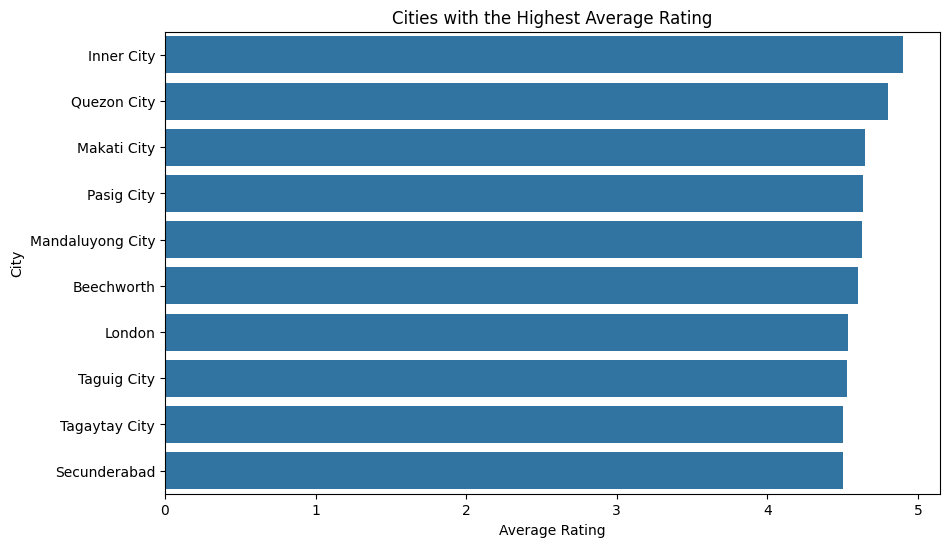

In [30]:
# Visualizing the distribution of average ratings by city
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Rating', y='City', data=top_rated_cities)
plt.title('Cities with the Highest Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()



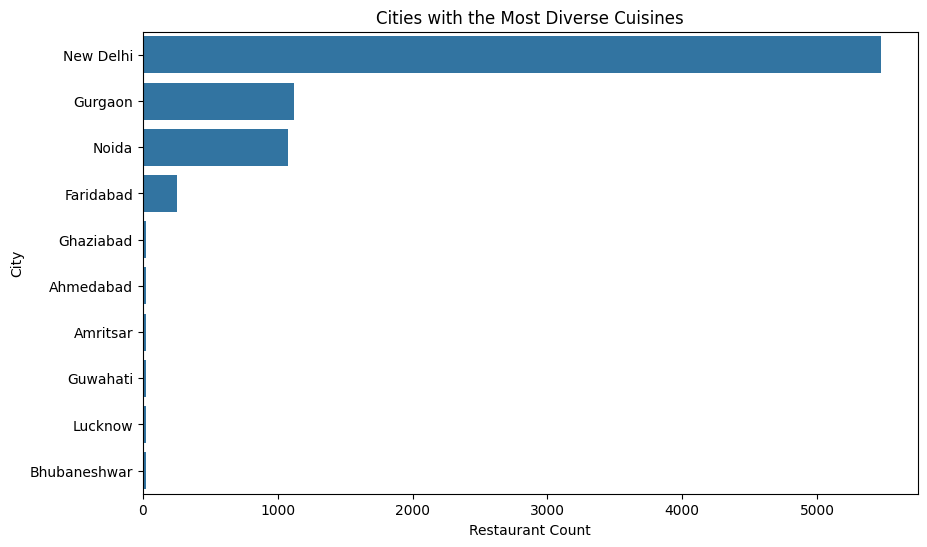

In [31]:
# Visualizing the distribution of restaurant counts by city
plt.figure(figsize=(10, 6))
sns.barplot(x='Restaurant Count', y='City', data=most_diverse_cities)
plt.title('Cities with the Most Diverse Cuisines')
plt.xlabel('Restaurant Count')
plt.ylabel('City')
plt.show()
